In [2]:
#Import
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fnmatch import fnmatch
import math
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

In [1]:
import matplotlib

In [2]:
matplotlib.__version__

'3.7.3'

In [3]:
#Add the filepath here
filepath = r"Z:\Data\@MiN\Sarah\Projects\Nikita_WoundRepair\4 - Heatmap Representation\Data set for punctae count graph"
dir_list = os.listdir(filepath)

In [4]:
root = filepath
pattern_test = "*16*" # This determines which files will be "Test"
pattern_control = "*0.2*" # This determines which files will be "Control"
frame_int = 1.56 #in seconds

df_X = pd.DataFrame()
df_Y= pd.DataFrame()


for path, subdirs, files in os.walk(root): # Walks through all folders and subfulders
    
    for name in files:
        if fnmatch(name, pattern_test): # Opens all "Test"-Files
            df_X_ = pd.read_csv(os.path.join(path, name), encoding = 'unicode_escape', engine ='python')
            df_X_["Name"] = path + "_" + name
            df_X_["Condition"] = "test"
            df_X_["ROI"] = name.split("_")[-1].split(".csv")[0]
            df_X_["ROI"] = df_X_.ROI.astype(int)-1
            df_X_["Frame_scaled"] = df_X_.Frame.astype(int)*frame_int
            df_X_["Frame_scaled"] = df_X_.Frame_scaled.round(1)
            df_X = pd.concat([df_X, df_X_])
            
            
        if fnmatch(name, pattern_control): # Opens all "Control"-Files
            df_Y_ = pd.read_csv(os.path.join(path, name), encoding = 'unicode_escape', engine ='python')
            df_Y_["Condition"] = "control" 
            df_Y_["Name"] = path + "_" + name
            df_Y_["ROI"] = name.split("_")[-1].split(".csv")[0]
            df_Y_["ROI"] = df_Y_.ROI.astype(int)-1
            df_Y_["Frame_scaled"] = df_Y_.Frame.astype(int)*frame_int
            df_Y_["Frame_scaled"] = df_Y_.Frame_scaled.round(1)
            df_Y = pd.concat([df_Y, df_Y_])

df_X.reset_index(drop=True, inplace=True)            
df_Y.reset_index(drop=True, inplace=True)

df_X.to_csv(filepath+"/TEST_alldata.csv")
df_Y.to_csv(filepath+"/CONTROL_alldata.csv")

### Norm Particles per µm^2 Mean

In [5]:
#Creates two Pivot-tables for control and test from dataframes
df_pivot_test = df_X.pivot_table(index="ROI", columns="Frame_scaled", values="Norm Particles per µm^2 Mean", aggfunc='mean')
df_pivot_control = df_Y.pivot_table(index="ROI", columns="Frame_scaled", values="Norm Particles per µm^2 Mean", aggfunc='mean')

#Save to Excel file
df_pivot_test.to_csv(filepath+"/TEST_NormParticlesperµm^2Mean.csv")
df_pivot_control.to_csv(filepath+"/CONTROL_NormParticlesperµm^2Mean.csv")

In [6]:
plt.rcParams.update(plt.rcParamsDefault)
print(f"Sans-serif fonts: {plt.rcParams['font.sans-serif']}")
print(f"Serif fonts: {plt.rcParams['font.serif']}")

Sans-serif fonts: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
Serif fonts: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']


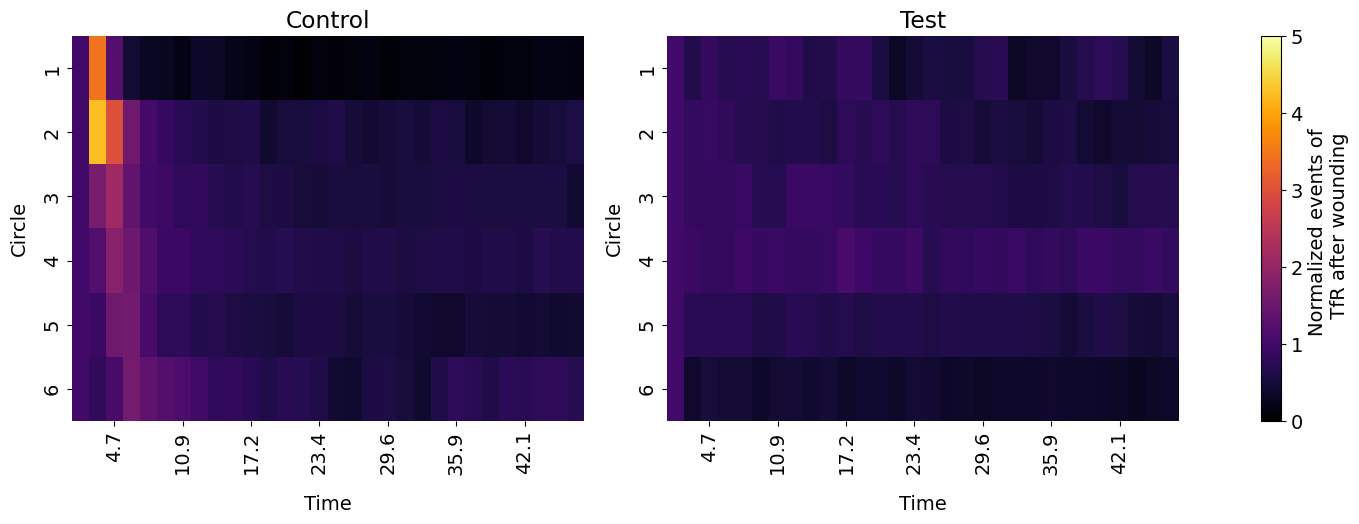

<Figure size 640x480 with 0 Axes>

In [7]:
# Plotting
# We start at 0, if you want to plot frame 2 , use 1

skip_tick = 2 # will skip every 2nd tick # set to 1 if you do not want to skip. (Will be automatically determined to prevent overcrowded axis)
starttick = 1 # start tick, choose in a way that you will keep frame 3 # choose 0 if you want to start at first frame

plt.rcParams['font.size'] = 14
plt.rcParams["font.family"] = "sans-serif" # "sans-serif" 
plt.rcParams["font.serif"] = "Arial" # choose one from above
# plt.rc('axes', labelweight='bold') # if enabled makes the x-, y- and colormap label bold.

figure_title = "SavingName.tiff" #Saving file name
title_left = "Control" # Title of the left graph
title_right = "Test" # Title of the right graph
min_frame = 0 # start frame
max_frame = 50 # end frame
vmax = 5 # maximum color of heatmap
vmin = 0 # set to 1 --> appears black now
first_circle = 1 # first circle to be plotted
max_circle = 6 # last circle to be plotted

xlabel = "Time"
ylabel = "Circle"
legendlabel = "Normalized events of \n TfR after wounding" # The \n should work!
cmap = mpl.cm.inferno
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5), gridspec_kw={'width_ratios': [1, 1, 0.4]} ) #sharey=True,
sns.heatmap(df_pivot_test.iloc[first_circle:max_circle+1, min_frame:max_frame], vmin=vmin, vmax=vmax, 
            cmap=cmap, ax=axes[0], cbar=False, norm=norm).set_title(title_left) 
sns.heatmap(df_pivot_control.iloc[first_circle:max_circle+1, min_frame:max_frame], vmin=vmin, vmax=vmax, 
            cmap=cmap, ax=axes[1], cbar=False, norm=norm).set_title(title_right) 

#visible_labels = [lab for lab in axes[0].get_xticklabels() if lab.get_visible() is True and lab.get_text() != '']
#plt.setp(visible_labels[::2], visible=False)

#axes[0].tick_params(axis='x', pad=30)

axes[0].set_xlabel(xlabel, labelpad=15)
axes[0].set_xticks(axes[0].get_xticks()[starttick::skip_tick])
axes[0].set_ylabel(ylabel, labelpad=10)
axes[1].set_xlabel(xlabel, labelpad=15)
axes[1].set_xticks(axes[1].get_xticks()[starttick::skip_tick])
axes[1].set_ylabel(ylabel, labelpad=10)



# Creating colormap
axes[2].spines["top"].set_visible(False)
axes[2].spines["bottom"].set_visible(False)
axes[2].spines["right"].set_visible(False)
axes[2].spines["left"].set_visible(False)
axes[2].get_xaxis().set_ticks([])
axes[2].get_yaxis().set_ticks([])

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=axes[2], ticks=np.arange(vmin, vmax+0.0001, 1), label=legendlabel, fraction=1)

# Saving figure
plt.savefig(filepath+"\\"+figure_title, dpi=600, transparent=True, bbox_inches="tight", format="tiff")

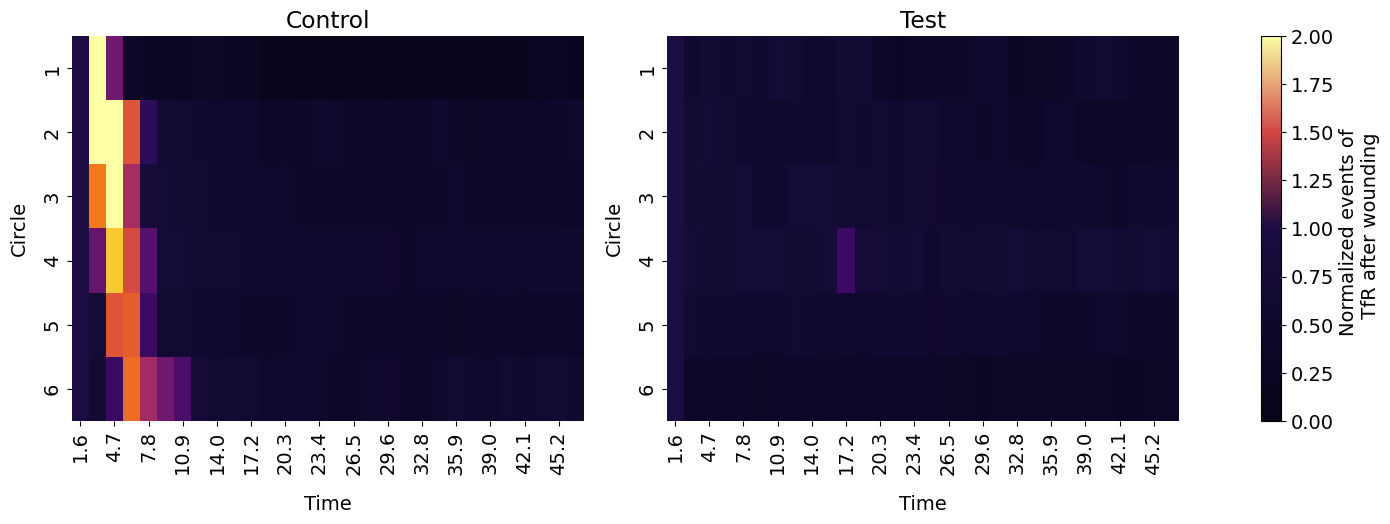

In [25]:
# Plotting


skip_tick = 1 # 2: will skip every 2nd tick, 1: won't skip
starttick = 0 # start tick, choose in a way that you will keep frame 3; starts at first frame this way. 

plt.rcParams['font.size'] = 14
plt.rcParams["font.family"] = "sans-serif" # "sans-serif" 
plt.rcParams["font.serif"] = "Arial" # choose one from above
# plt.rc('axes', labelweight='bold') # if enabled makes the x-, y- and colormap label bold.

figure_title = "SavingName_AdjustedColor.tiff" #Saving file name
title_left = "Control" # Title of the left graph
title_right = "Test" # Title of the right graph
min_frame = 0 # start frame
max_frame = 50 # end frame
vmax = 2 # maximum color of heatmap
vmin = 0 # set to 0 --> appears dark/blue now
first_circle = 1 # first circle to be plotted
max_circle = 6 # last circle to be plotted

xlabel = "Time"
ylabel = "Circle"
legendlabel = "Normalized events of \n TfR after wounding" # The \n should work!
#cmap = mpl.cm.inferno
#norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
colors_smaller1 = plt.cm.inferno(np.linspace(0, 0.1, 256))
colors_bigger1 = plt.cm.inferno(np.linspace(0.11, 1, 256))
all_colors = np.vstack((colors_smaller1, colors_bigger1))
my_map = colors.LinearSegmentedColormap.from_list(
    'magma', all_colors)
divnorm = colors.TwoSlopeNorm(vmin=-vmax+1, vcenter=1, vmax=vmax)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5), gridspec_kw={'width_ratios': [1, 1, 0.4]} ) #sharey=True,
sns.heatmap(df_pivot_test.iloc[first_circle:max_circle+1, min_frame:max_frame], vmin=vmin, vmax=vmax, 
            cmap=my_map, ax=axes[0], cbar=False, norm=divnorm).set_title(title_left) 
sns.heatmap(df_pivot_control.iloc[first_circle:max_circle+1, min_frame:max_frame], vmin=vmin, vmax=vmax, 
            cmap=my_map, ax=axes[1], cbar=False, norm=divnorm).set_title(title_right) 

#visible_labels = [lab for lab in axes[0].get_xticklabels() if lab.get_visible() is True and lab.get_text() != '']
#plt.setp(visible_labels[::2], visible=False)

#axes[0].tick_params(axis='x', pad=30)

axes[0].set_xlabel(xlabel, labelpad=15)
axes[0].set_xticks(axes[0].get_xticks()[starttick::skip_tick])
axes[0].set_ylabel(ylabel, labelpad=10)
axes[1].set_xlabel(xlabel, labelpad=15)
axes[1].set_xticks(axes[1].get_xticks()[starttick::skip_tick])
axes[1].set_ylabel(ylabel, labelpad=10)



# Creating colormap
axes[2].spines["top"].set_visible(False)
axes[2].spines["bottom"].set_visible(False)
axes[2].spines["right"].set_visible(False)
axes[2].spines["left"].set_visible(False)
axes[2].get_xaxis().set_ticks([])
axes[2].get_yaxis().set_ticks([])


myrgbcolors = [0.0, 1.0] + np.linspace(2, vmax, vmax).tolist()
if vmax < 3:
    myrgbcolors = [0.0, 0.5, 1.0, 1.5, 2.0]
adjustedcmap = mpl.cm.ScalarMappable(norm=divnorm, cmap=my_map).to_rgba(myrgbcolors)
cmap1 = colors.LinearSegmentedColormap.from_list("mycmap", adjustedcmap)
norm = mpl.colors.Normalize(vmin=0, vmax=vmax) 
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap1), ax=axes[2], label=legendlabel, fraction=1)
#ticks=np.arange(vmin, vmax+0.0001, 1), 
# Saving figure
plt.savefig(filepath+"\\"+figure_title, dpi=600, transparent=True, bbox_inches="tight", format="tiff")